# Data Analysis Project

### Pandas API
Pandas is an open-source Python library with powerful and built-in methods to efficiently clean, analyze, and manipulate datasets. Developed by Wes McKinney in 2008, this powerful package can easily blend with various other data science modules in Python.

Pandas is built on top of the NumPy library, i.e., its data structures Series and DataFrame are the upgraded versions of NumPy arrays.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas conveniently provides a function to read and save excel files. 

### Dataset Pre-analysis

In [9]:
dataset = pd.read_excel("C:/Users/ms742/DataAnalysisProject/AQUASTAT Dataset.xlsx")

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'notebooks/folder/AQUASTAT Dataset.xlsx'

Here is the first 10 rows of the dataset. The dataset is vertically sorted by the subgroup and variable and then every area or country is grouped together in ascending order of year.

In [14]:
dataset.head(10)

,VariableGroup,Subgroup,Variable,Area,Year,Value,Unit,Symbol,IsAggregate
0,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2012,43.7,%,X,False
1,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2013,45.4,%,X,False
2,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2014,47.0,%,X,False
3,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2015,47.0,%,X,False
4,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2016,47.0,%,I,False
5,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2017,47.0,%,I,False
6,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2018,47.0,%,I,False
7,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2019,47.0,%,I,False
8,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2020,47.0,%,I,False
9,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2021,47.0,%,I,False


In [15]:
dataset.info() # Function retrieves technical info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VariableGroup  50000 non-null  object 
 1   Subgroup       50000 non-null  object 
 2   Variable       50000 non-null  object 
 3   Area           50000 non-null  object 
 4   Year           50000 non-null  int64  
 5   Value          50000 non-null  float64
 6   Unit           43041 non-null  object 
 7   Symbol         50000 non-null  object 
 8   IsAggregate    50000 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 3.1+ MB


All of the entries listed as 'object' are character strings. The symbol 'I' means imputed, 'X' means external and 'E' means estimate. This indicates how the information was sourced. For the purposes of this project the symbol column shall be discarded and the isAggregate column also. 'isAggregate' is true if the area is a combination of multiple countries or regions such as 'South-east Asia'. A selection few countries shall be included in the cleaned dataset not regions; therefore the isAggregate is not necessary.

### Dataset Filtering & Cleaning

Pandas provides extensive tools of dataset manipulation.

In [24]:
dataset_afghanistan = dataset[dataset["Area"] == "Afghanistan"]

In [17]:
dataset_afghanistan

,VariableGroup,Subgroup,Variable,Area,Year,Value,Unit,Symbol,IsAggregate
0,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2012,43.700000,%,X,False
1,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2013,45.400000,%,X,False
2,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2014,47.000000,%,X,False
3,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2015,47.000000,%,X,False
4,Environment and health,Access to improved drinking water source,Rural population with access to safe drinking-...,Afghanistan,2016,47.000000,%,I,False
...,...,...,...,...,...,...,...,...,...
49875,Irrigation and drainage development,Area equipped for irrigation by source of water,% of area equipped for irrigation by groundwater,Afghanistan,2017,17.992519,%,I,False
49876,Irrigation and drainage development,Area equipped for irrigation by source of water,% of area equipped for irrigation by groundwater,Afghanistan,2018,17.992519,%,I,False
49877,Irrigation and drainage development,Area equipped for irrigation by source of water,% of area equipped for irrigation by groundwater,Afghanistan,2019,17.992519,%,I,False
49878,Irrigation and drainage development,Area equipped for irrigation by source of water,% of area equipped for irrigation by groundwater,Afghanistan,2020,17.992519,%,I,False


As an example I can filter out for only the rows with the country Afghanistan.

For the purposes of this dataset I shall include 30 countries. A particular country is not selected for any important reason.

In [22]:
countries = {"Afghanistan", "Mongolia", "Iraq", "Italy", "Slovenia", "Tunisia", "France", "Bolivia", "Sudan", "Egypt", "Japan", "Burkina Faso", "Kenya", "Syria", "Azerbaijan", "Mexico", "Norway", "Türkiye", "Philipines", "Austrailia", "Russia", "Argentina", "Zambia", "Jamaica", "Finland", "Oman", "Brazil", "Nepal", "Vietnam", "Switzerland"}

print(len(countries))

30


In [25]:
dataset_filtered = dataset[dataset["Area"].isin(countries)]

In [26]:
dataset_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6218 entries, 0 to 49979
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VariableGroup  6218 non-null   object 
 1   Subgroup       6218 non-null   object 
 2   Variable       6218 non-null   object 
 3   Area           6218 non-null   object 
 4   Year           6218 non-null   int64  
 5   Value          6218 non-null   float64
 6   Unit           5286 non-null   object 
 7   Symbol         6218 non-null   object 
 8   IsAggregate    6218 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 443.3+ KB


In [27]:
dataset_filtered['Area'].nunique() # Confirming that there are 30 countries in the dataset.

24

Initially this gave 24 countries instead of the 30 it should give.

In [78]:
for column in dataset_filtered.columns:
    if column == 'VariableGroup':
        unique_values = dataset_filtered["Area"].unique()
        print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'VariableGroup': ['Afghanistan' 'Argentina' 'Australia' 'Azerbaijan'
 'Bolivia (Plurinational State of)' 'Brazil' 'Burkina Faso' 'Egypt'
 'Finland' 'France' 'Iraq' 'Italy' 'Jamaica' 'Japan' 'Kenya' 'Mexico'
 'Mongolia' 'Nepal' 'Norway' 'Oman' 'Philippines' 'Russian Federation'
 'Slovenia' 'Sudan' 'Switzerland' 'Syrian Arab Republic' 'Tunisia'
 'Türkiye' 'Viet Nam' 'Zambia']


In [55]:
# Bolivia (Plurinational State of), Syrian Arab Republic, Philippines, Russian Federation, Viet Nam, and Australia. Were misspelled.

countries = {"Afghanistan", "Mongolia", "Iraq", "Italy", "Slovenia", "Tunisia", "France", "Bolivia (Plurinational State of)", "Sudan", "Egypt", "Japan", "Burkina Faso", "Kenya", "Syrian Arab Republic", "Azerbaijan", "Mexico", "Norway", "Türkiye", "Philippines", "Australia", "Russian Federation", "Argentina", "Zambia", "Jamaica", "Finland", "Oman", "Brazil", "Nepal", "Viet Nam", "Switzerland"}

dataset_filtered = dataset[dataset["Area"].isin(countries)]

dataset_filtered['Area'].nunique()

30

The error has been rectified, now the unneccsary columns shall be pruned.

In [57]:
dataset_filtered.drop(columns=['Symbol', 'IsAggregate'], inplace=True)

In [58]:
dataset_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7892 entries, 0 to 49979
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VariableGroup  7892 non-null   object 
 1   Subgroup       7892 non-null   object 
 2   Variable       7892 non-null   object 
 3   Area           7892 non-null   object 
 4   Year           7892 non-null   int64  
 5   Value          7892 non-null   float64
 6   Unit           6726 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 493.2+ KB


### Preliminary Dataset Analysis

I will be examining four statistics in the dataset access to safe drinking water, arable land, GDP per capita and undernourishment. This analysis will rank the statistics by descending order for each of the 30 countries. 

#### Total population with access to safe drinking-water

I am mostly interested in water scarcity in each country so let's calculate the mean access to water for every country for every year included in the filtered dataset.

In [60]:
# Filter the dataset for rows where 'Variable' is 'Access to safe drinking water'
water_access_dataset = dataset_filtered[dataset_filtered["Variable"] == "Total population with access to safe drinking-water (JMP)"]

In [61]:
# Group by 'Area' and calculate the mean of 'Value'
mean_access_to_water = water_access_dataset.groupby("Area")["Value"].mean()

In [76]:
# Displaying Results
mean_access_to_water.sort_values(ascending=False, inplace=True) # Pandas library function for sorting series.

In [77]:
mean_access_to_water

Area
Italy                               100.00
Norway                              100.00
Japan                               100.00
Switzerland                         100.00
Australia                           100.00
France                              100.00
Finland                             100.00
Türkiye                              99.93
Slovenia                             99.50
Egypt                                99.29
Argentina                            99.00
Brazil                               98.01
Tunisia                              97.58
Russian Federation                   96.86
Viet Nam                             96.85
Mexico                               95.95
Jamaica                              93.80
Oman                                 93.38
Philippines                          91.60
Nepal                                91.06
Syrian Arab Republic                 90.10
Bolivia (Plurinational State of)     89.77
Iraq                                 86.54
Azerba

mean_access_to_water.plot()

<AxesSubplot:xlabel='Area', ylabel='Total Population Access to Water %'>

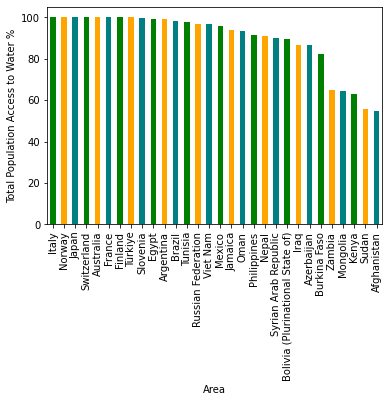

In [89]:
mean_access_to_water.plot.bar(xlabel='Area', ylabel='Total Population Access to Water %', color=['green','orange','teal'])

The same process of data analysis will be repeated for Arable land area, Prevalence of undernourishment and GDP per capita.

#### Peak Arable land area

In [100]:
# Filter the dataset for rows where 'Variable' is 'Arable land'
arable_land_dataset = dataset_filtered[dataset_filtered["Variable"] == "Arable land area"]

# Group by 'Area' and calculate the maximum of 'Value'
max_arable_land_area = arable_land_dataset.groupby("Area")["Value"].max()

# Displaying Results
max_arable_land_area.sort_values(ascending=False, inplace=True) # Pandas library function for sorting series.

In [101]:
max_arable_land_area

Area
Russian Federation                  121649.0000
Brazil                               58252.7600
Argentina                            42208.7597
Australia                            31960.3000
Mexico                               22552.0000
Sudan                                20994.8400
Türkiye                              20699.0000
France                               18478.7000
Afghanistan                           7829.0000
Italy                                 7199.4140
Viet Nam                              7002.8000
Burkina Faso                          6100.0000
Kenya                                 5800.0000
Philippines                           5590.0000
Iraq                                  4969.0000
Bolivia (Plurinational State of)      4868.3672
Syrian Arab Republic                  4668.4500
Japan                                 4246.0000
Zambia                                3800.0000
Egypt                                 3365.0000
Tunisia                            

<AxesSubplot:xlabel='Area', ylabel='Mean Arable Land (1000ha)'>

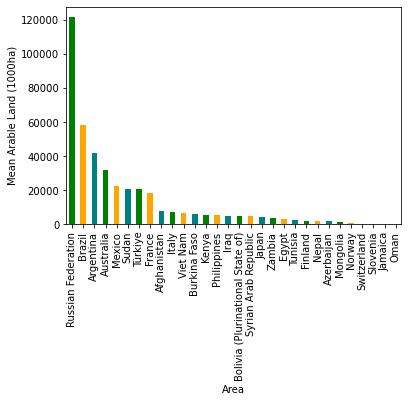

In [106]:
max_arable_land_area.plot.bar(xlabel='Area', ylabel='Mean Arable Land (1000ha)', color=['green','orange','teal'])

#### Prevalence of undernourishment


In [97]:
# Filter the dataset for rows where 'Variable' is 'Prevalence of undernourishment'
undernourishment_dataset = dataset_filtered[dataset_filtered["Variable"] == "Prevalence of undernourishment (3-year average)"]

# Group by 'Area' and calculate the mean of 'Value'
prevalence_of_undernourishment = undernourishment_dataset.groupby("Area")["Value"].mean()

# Displaying Results
prevalence_of_undernourishment.sort_values(ascending=False, inplace=True) # Pandas library function for sorting series.

In [98]:
prevalence_of_undernourishment

Area
Zambia                              33.21
Afghanistan                         22.77
Kenya                               20.81
Iraq                                16.69
Bolivia (Plurinational State of)    16.04
Syrian Arab Republic                14.20
Burkina Faso                        13.89
Sudan                               11.38
Philippines                          8.48
Mongolia                             8.26
Jamaica                              7.49
Viet Nam                             6.87
Nepal                                6.37
Egypt                                5.80
Oman                                 5.15
Mexico                               3.99
Argentina                            3.14
Tunisia                              2.87
Brazil                               2.83
Japan                                2.70
Russian Federation                   2.60
Azerbaijan                           2.50
Name: Value, dtype: float64

<AxesSubplot:xlabel='Area', ylabel='Prevalence Of Undernourishment %'>

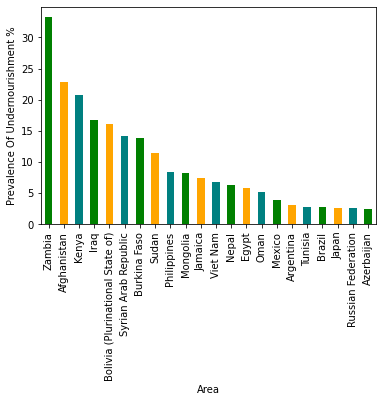

In [105]:
prevalence_of_undernourishment.plot.bar(xlabel='Area', ylabel='Prevalence Of Undernourishment %', color=['green','orange','teal'])

#### GDP per capita

In [107]:
# Filter the dataset for rows where 'Variable' is 'Prevalence of undernourishment'
GDP_per_capita_dataset = dataset_filtered[dataset_filtered["Variable"] == "GDP per capita"]

# Group by 'Area' and calculate the mean of 'Value'
mean_GDP_per_capita = GDP_per_capita_dataset.groupby("Area")["Value"].mean()

# Displaying Results
mean_GDP_per_capita.sort_values(ascending=False, inplace=True) # Pandas library function for sorting series.

In [108]:
mean_GDP_per_capita

Area
Switzerland                         86790.644733
Norway                              83620.797496
Australia                           59804.341873
Finland                             48232.820195
France                              42163.672576
Japan                               40208.014877
Italy                               33641.545654
Slovenia                            24113.441148
Oman                                20030.689348
Argentina                           12500.070320
Russian Federation                  12010.068161
Türkiye                             10500.195235
Mexico                               9908.360674
Brazil                               9632.475169
Azerbaijan                           5481.283868
Iraq                                 5287.380230
Jamaica                              5218.655703
Mongolia                             4146.589717
Tunisia                              3842.077253
Bolivia (Plurinational State of)     3106.528706
Philippines    

<AxesSubplot:xlabel='Area', ylabel='Prevalence Of Undernourishment %'>

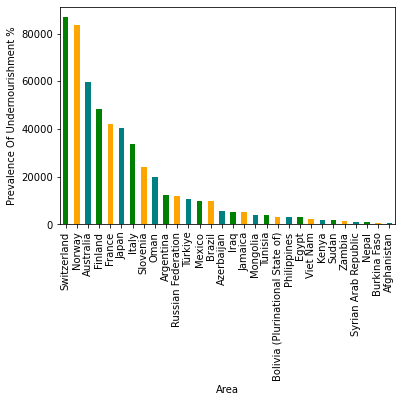

In [109]:
mean_GDP_per_capita.plot.bar(xlabel='Area', ylabel='Prevalence Of Undernourishment %', color=['green','orange','teal'])

### Advanced Dataset Analysis

#### Comparing correlations between data points

We will be comparing the correlation between arable land and water scarcity.

In [110]:
merged_data_water_arable = pd.merge(water_access_dataset, arable_land_dataset, on=["Area", "Year"]) # Merging the arable land and water scarcity filtered datasets from earlier.

In [111]:
merged_data_water_arable

,VariableGroup_x,Subgroup_x,Variable_x,Area,Year,Value_x,Unit_x,VariableGroup_y,Subgroup_y,Variable_y,Value_y,Unit_y
0,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2012,51.6,%,Geography and population,Land use,Arable land area,7790.0,1000 ha
1,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2013,53.4,%,Geography and population,Land use,Arable land area,7785.0,1000 ha
2,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2014,55.2,%,Geography and population,Land use,Arable land area,7771.0,1000 ha
3,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2015,55.3,%,Geography and population,Land use,Arable land area,7765.0,1000 ha
4,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Afghanistan,2016,55.3,%,Geography and population,Land use,Arable land area,7729.0,1000 ha
...,...,...,...,...,...,...,...,...,...,...,...,...
295,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Zambia,2017,65.4,%,Geography and population,Land use,Arable land area,3800.0,1000 ha
296,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Zambia,2018,65.4,%,Geography and population,Land use,Arable land area,3800.0,1000 ha
297,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Zambia,2019,65.4,%,Geography and population,Land use,Arable land area,3800.0,1000 ha
298,Environment and health,Access to improved drinking water source,Total population with access to safe drinking-...,Zambia,2020,65.4,%,Geography and population,Land use,Arable land area,3800.0,1000 ha


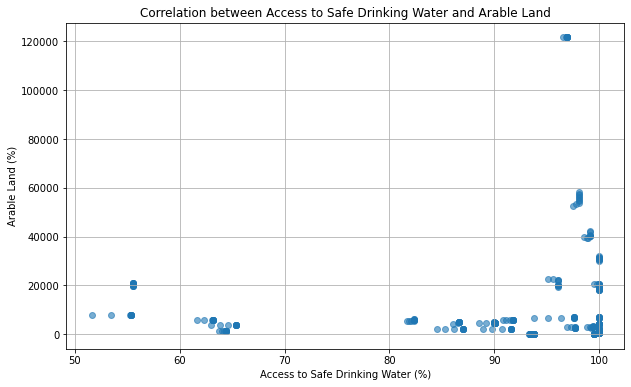

In [119]:
plt.figure(figsize=(10, 6)) # Size of graph
plt.scatter(merged_data_water_arable["Value_x"], merged_data_water_arable["Value_y"], alpha=0.6) # The values selected are from the previous datasets

plt.title('Correlation between Access to Safe Drinking Water and Arable Land')
plt.xlabel('Access to Safe Drinking Water (%)')
plt.ylabel('Arable Land (1000ha)')
plt.grid(True)

In [ ]:
plt.show() # Graph below of the correlation between safe drinking water and arable land.

There isn't any real correlation between arable land and access to drinking water, the vast majority of countries are small so they have under 20000 (1000ha) of arable land regardless. However, it is interesting to note that all the large countries with a lot of arable land have good access to water. That is because the largest countries in the world have the greatest economies and they tend to control territory with large diverse biomes; this increases the likelihood of their land containing rivers, lakes, and water reservoirs. It is usually smaller to mid-sized countries around the equator that suffer from lack of clean water.

#### Correlation between GDP per capita & Undernourishment

Comparing GDP per capita and undernourishment is going to give a obvious and straightforward answer. The wealthier the citizens are the less likely that they have problems accessing food.

In [ ]:
merged_data_GDP_undernourishment = pd.merge(GDP_per_capita_dataset, undernourishment_dataset, on=["Area", "Year"]) # Merging the GDP per capita and prevalence of undernourishment filtered datasets from earlier.

In [ ]:
plt.figure(figsize=(10, 6)) # Size of graph
plt.scatter(merged_data_GDP_undernourishment["Value_x"], merged_data_GDP_undernourishment["Value_y"], alpha=0.6) # The values selected are from the previous datasets

plt.title('Correlation between GDP per capita and undernourishment')
plt.xlabel('Prevalence of undernourishment (%)')
plt.ylabel('GDP per Capita (100$)')
plt.grid(True)

In [ ]:
plt.show() # Graph below of the correlation between GDP per capita and prevalence of undernourishment.

The results of the scatter graph clearly supports my hypothesis.

#### Correlation between GDP per capita & agriculture value added to GDP

Now I will be considering a statistic not used so far in this project. Agricultural value added to GDP as a percentage, the question I will try to answer is the relationship between GDP per capita and the percentage of a countries economy dominated by agriculture. 

In [ ]:
# Extracting the new data for every country.
# Filter the dataset for rows where 'Variable' is 'Agriculture, value added (% GDP)'
agriculture_value_added_dataset = dataset_filtered[dataset_filtered["Variable"] == "Agriculture, value added (% GDP)"]

# Group by 'Area' and calculate the mean of 'Value'
agriculture_value_added = agriculture_value_added_dataset.groupby("Area")["Value"].mean()

In [ ]:
merged_data_GDP_and_agricultural_GDP = pd.merge(GDP_per_capita_dataset, agriculture_value_added_dataset, on=["Area", "Year"]) # Merging the GDP per capita and agriculture as added GDP to the economy filtered datasets from earlier.

In [ ]:
plt.figure(figsize=(10, 6)) # Size of graph
plt.scatter(merged_data_GDP_and_agricultural_GDP["Value_x"], merged_data_GDP_and_agricultural_GDP["Value_y"], alpha=0.6) # The values selected are from the previous datasets

plt.title('Correlation between GDP per capita and agricultural GDP')
plt.xlabel('GDP per Capita (100$)')
plt.ylabel('Agriculture, value added (% GDP)')
plt.grid(True)

In [ ]:
plt.show() # Graph below of the correlation between GDP per capita and prevalence of undernourishment.

There is trend indicating that countries whose economies are more dominated by agriculture tend to have lower GDP per capitas. Some larger countries somewhat break this trend.   

### Regression Analysis

I will be demonstrating the use of regression analysis to to examine the relationships of three of the four statistics discussed in the preliminary dataset. The statistic for total arable land shall be replaced by the percentage of total GDP agriculture contributes. This analysis is performed on the filtered dataset which includes 30 countries the datapoints is an average of the data from 2012 to 2021 inclusive.

In [ ]:
import statsmodels.api as sm
import seaborn as sns

In [ ]:
# First, all of the data must be merged into one dataset.
combined_variables = mean_GDP_per_capita.merge(prevalence_of_undernourishment, on='Area').merge(agriculture_value_added_dataset, on='Area').merge(mean_access_to_water, on='Area')

In [ ]:
# Renaming the columns
combined_variables = ['Area', 'GDP per capita', 'Undernourishment', 'GDP Agriculture', 'Access to Water']

In [ ]:
# Labelling the independent variables X and the dependent variables Y.
x = combined_variables[['Undernourishment', 'GDP Agriculture', 'Access to Water']]

y = combined_variables['GDP per capita']

In [ ]:
# Must include a constant to account for the intercept in the regression model.
X = sm.add_constant(X)

In [ ]:
# Performing regression analysis with model fit.
model = sm.OLS(y, x).fit()

print(model.summary())

In [ ]:
# Plotting the results
sns.pairplot(combined_variables, x_vars = ['Undernourishment', 'GDP Agriculture', 'Access to Water'], y_vars = 'GDP per capita', kind='reg', height=5)

#### Summary of Plot and Findings

### Machine Learning Models

The aim of this section is to test the possibility of using machine learning as a tool to predict GDP per capita of a country from the values of undernourishment, access to clean water and total population. We have already discovered that undernourishment and access to clean water negatively correlate with GDP per capita so, theoretically, a model should be able to discern a strong relationship and make accurate predictions. 

In [ ]:
from sklearn.model

In [ ]:
# Split the dataset 80/20:24/6 countries training set/test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the linear regression model using the training data.
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
# Making predictions
y_pred = model.predict(x_test)

R-squared is a value from 0 to 1 that explains how much the variability in the output variable can be explained by the input variables that the model used. Mean squared error is the average of squared differences between predicted and actual values. It is useful for when we have extreme unexpected values.

In [ ]:
# Evaluating the accuracy of the model.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual GDP per capita')
plt.ylabel('Predicted GDP per capita')
plt.title('Actual vs predicted GDP per capita')

In [ ]:
plt.show()

#### Evaluating the Model

### Analysing the Trend over Time for Afghanistan

I was able to filter for 'Area' is Afghanistan previously to create a brand new smaller dataset. I will now use that dataset to compare temporal trends in Afghanistan for some major statistics. I will analyse the 

In [ ]:
#
listVariables = {}

In [ ]:
# Filter for the variables I want.
dataset_afghanistan = dataset_afghanistan[dataset_afghanistan["Variable"].isin(listVariables)]

In [ ]:
# use plot() method on the dataframe 
for variable in listVariables:   
    dataset_afghanistan.plot(variable, 'Value') 